In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Data Processing & Handling
import numpy as np  # Linear algebra
import pandas as pd  # Data processing, CSV file I/O (e.g. pd.read_csv)

# Data Visualization
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Plotting

# Model Selection & Evaluation
from sklearn.model_selection import train_test_split  # Train-test split
from sklearn.model_selection import cross_val_score, GridSearchCV  # Cross-validation and Grid Search

# Preprocessing & Encoding
from sklearn.impute import SimpleImputer  # Handle missing data
from sklearn.pipeline import Pipeline  # Pipeline for machine learning workflow
from sklearn.compose import ColumnTransformer  # Column-wise transformations
from sklearn.preprocessing import OneHotEncoder  # One hot encoding
from sklearn.preprocessing import LabelEncoder  # Label encoding
from sklearn.preprocessing import StandardScaler  # Feature scaling

# Classifiers
from sklearn.linear_model import LogisticRegression  # Logistic regression
from sklearn.dummy import DummyClassifier  # Dummy classifier (baseline)
from sklearn.tree import DecisionTreeClassifier  # Decision tree
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors
from sklearn.ensemble import GradientBoostingClassifier  # Gradient boosting
from xgboost import XGBClassifier  # XGBoost classifier
from lightgbm import LGBMClassifier  # LightGBM classifier

# Imbalanced Data Handling
from imblearn.over_sampling import SMOTE  # SMOTE for over-sampling
from imblearn.pipeline import Pipeline as ImbPipeline  # Imbalanced pipeline

# Model Evaluation Metrics
from sklearn.metrics import f1_score, classification_report, confusion_matrix  # Evaluation metrics


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv


# **1. Loading the Dataset**

In [2]:
train_df = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv')
test_df = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv')

#Shape of the Training and Test Dataset
print(f'Training data shape: {train_df.shape}')
print(f'Test data shape: {test_df.shape}')

Training data shape: (39211, 16)
Test data shape: (10000, 15)


# **2. Exploratory Data Analysis (EDA)**

In [3]:
#Display first 10 rows of the training Dataset
train_df.head(n=10)

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no
5,2009-05-07,25,entrepreneur,single,tertiary,no,140,yes,no,cellular,348,1,-1,0,NaN,no
6,2009-05-15,46,blue-collar,married,secondary,no,668,yes,no,NaN,1263,2,-1,0,NaN,yes
7,2010-05-08,37,admin.,married,secondary,no,14,yes,no,NaN,176,2,-1,0,NaN,no
8,2008-12-13,38,unemployed,divorced,primary,yes,14123,yes,yes,cellular,2370,4,852,4,other,no
9,2010-05-21,31,technician,married,secondary,no,589,yes,yes,NaN,151,1,-1,0,NaN,no


In [4]:
#Display first 10 rows of the test Dataset
test_df.head(n=10)

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,2009-11-21,36,management,single,tertiary,no,7,no,no,NaN,20,1,-1,0,NaN
1,2010-02-04,30,unemployed,married,tertiary,no,1067,no,no,cellular,78,2,-1,0,NaN
2,2010-07-28,32,blue-collar,single,secondary,no,82,yes,no,cellular,86,4,-1,0,NaN
3,2010-06-09,38,admin.,married,primary,no,1487,no,no,NaN,332,2,-1,0,NaN
4,2008-03-02,59,management,married,tertiary,no,315,no,no,cellular,591,1,176,2,failure
5,2010-11-20,44,services,married,secondary,no,-289,no,yes,cellular,487,1,118,1,other
6,2010-04-17,28,admin.,married,secondary,no,254,no,yes,cellular,333,3,-1,0,NaN
7,2010-08-18,42,management,divorced,tertiary,no,1064,no,no,cellular,101,2,-1,0,NaN
8,2010-05-26,31,blue-collar,single,secondary,no,3201,yes,no,NaN,96,5,-1,0,NaN
9,2009-08-21,48,blue-collar,married,primary,no,492,no,yes,cellular,139,2,-1,0,NaN


In [5]:
#Info about the Train Dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

In [6]:
#Info about the Test Dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  10000 non-null  object
 1   age                10000 non-null  int64 
 2   job                9941 non-null   object
 3   marital            10000 non-null  object
 4   education          9610 non-null   object
 5   default            10000 non-null  object
 6   balance            10000 non-null  int64 
 7   housing            10000 non-null  object
 8   loan               10000 non-null  object
 9   contact            7316 non-null   object
 10  duration           10000 non-null  int64 
 11  campaign           10000 non-null  int64 
 12  pdays              10000 non-null  int64 
 13  previous           10000 non-null  int64 
 14  poutcome           2492 non-null   object
dtypes: int64(6), object(9)
memory usage: 1.1+ MB


In [7]:
#Descriptive Statistics of Train Dataset
train_df.describe()

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
#Descriptive Statistics of Test Dataset
test_df.describe()

,age,balance,duration,campaign,pdays,previous
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,42.261200,5328.789200,437.117700,5.159700,71.705700,12.028100
std,12.650137,15944.545194,761.232963,9.975928,160.374253,44.467155
min,18.000000,-3372.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,92.000000,108.000000,1.000000,-1.000000,0.000000
50%,40.000000,541.000000,196.000000,2.000000,-1.000000,0.000000
75%,50.000000,2051.000000,380.000000,4.000000,-1.000000,0.000000
max,94.000000,101418.000000,4909.000000,63.000000,871.000000,275.000000


In [9]:
#Total number of unique values in the train dataset
train_df.nunique()

last contact date    1013
age                    78
job                    11
marital                 3
education               3
default                 2
balance              9535
housing                 2
loan                    2
contact                 2
duration             3146
campaign               63
pdays                 865
previous              276
poutcome                3
target                  2
dtype: int64

In [10]:
#Total number of unique values in the test dataset
test_df.nunique()

last contact date     908
age                    77
job                    11
marital                 3
education               3
default                 2
balance              4384
housing                 2
loan                    2
contact                 2
duration             1664
campaign               63
pdays                 679
previous              261
poutcome                3
dtype: int64

In [11]:
# Check for missing values for training dataset
missing_values_train = train_df.isnull().sum()
print('missing values :\n' ,missing_values_train)

missing values :
 last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64


In [12]:
# Check for missing values for test dataset
missing_values_test = test_df.isnull().sum()
print('missing values :\n' ,missing_values_test)

missing values :
 last contact date       0
age                     0
job                    59
marital                 0
education             390
default                 0
balance                 0
housing                 0
loan                    0
contact              2684
duration                0
campaign                0
pdays                   0
previous                0
poutcome             7508
dtype: int64


In [13]:
# Check the unique values in categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
for column in categorical_columns:
    print(f"\nUnique values in {column}:", train_df[column].unique())


Unique values in job: ['blue-collar' 'technician' 'admin.' 'entrepreneur' 'unemployed'
 'management' 'services' 'student' 'self-employed' 'retired' 'housemaid'
 nan]

Unique values in marital: ['married' 'single' 'divorced']

Unique values in education: ['secondary' 'tertiary' 'primary' nan]

Unique values in default: ['no' 'yes']

Unique values in housing: ['yes' 'no']

Unique values in loan: ['no' 'yes']

Unique values in contact: ['cellular' 'telephone' nan]

Unique values in poutcome: ['other' nan 'failure' 'success']


## **2.1 Data Visualization**

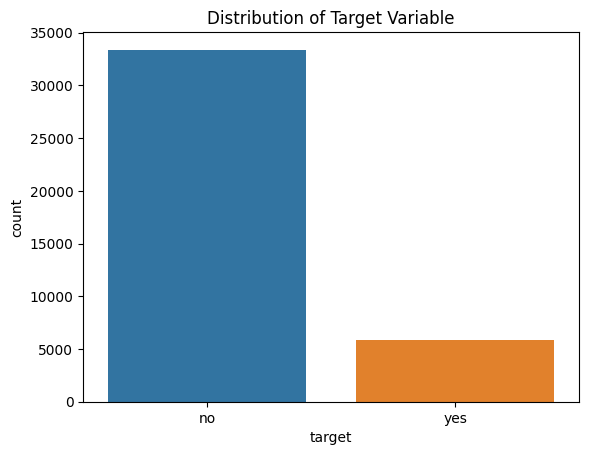

In [14]:
#Distribution of Target Variable
sns.countplot(x='target', data=train_df)
plt.title('Distribution of Target Variable')
plt.show()

In [15]:
train_df['target'].value_counts()

target
no     33384
yes     5827
Name: count, dtype: int64


Distribution of Numerical Features:


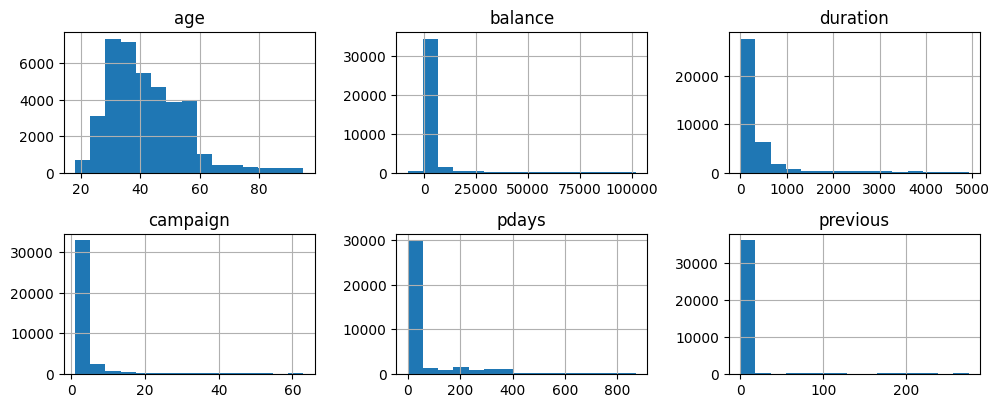

In [16]:
# Distribution of numerical features
numeric_features = train_df.select_dtypes(exclude=["object"]).columns

print("\nDistribution of Numerical Features:")
train_df[numeric_features].describe()


# Plot histograms for numerical features
train_df[numeric_features].hist(bins=15, figsize=(10, 10), layout=(5, 3))
plt.tight_layout()
plt.show()

In [17]:
print("\nRange of Numerical Features:")
for feature in numeric_features:
    feature_range = train_df[feature].max() - train_df[feature].min()
    print(f"{feature}: {train_df[feature].min()} - {train_df[feature].max()} (Range: {feature_range})")


Range of Numerical Features:
age: 18 - 95 (Range: 77)
balance: -8019 - 102127 (Range: 110146)
duration: 0 - 4918 (Range: 4918)
campaign: 1 - 63 (Range: 62)
pdays: -1 - 871 (Range: 872)
previous: 0 - 275 (Range: 275)


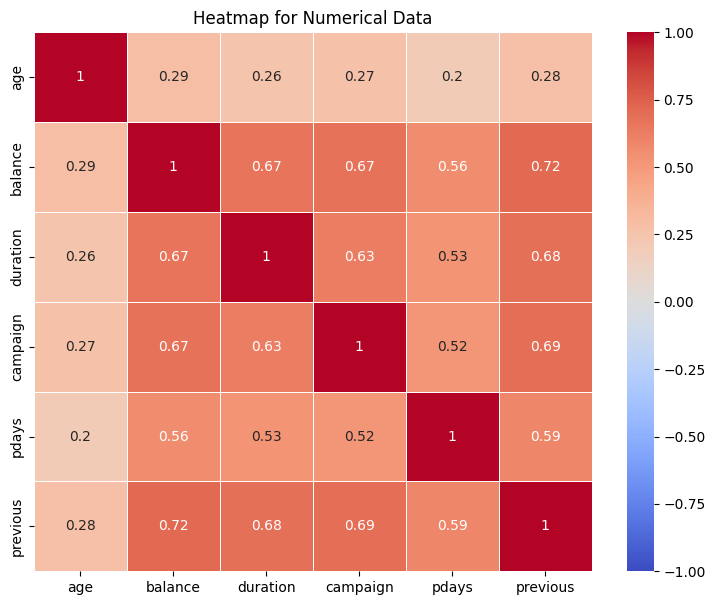

In [18]:
# Getting all numerical columns
numerical_columns = train_df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numerical_columns.corr()

# Plotting the heatmap with a color map like 'coolwarm' for a better color range
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Heatmap for Numerical Data")
plt.show()

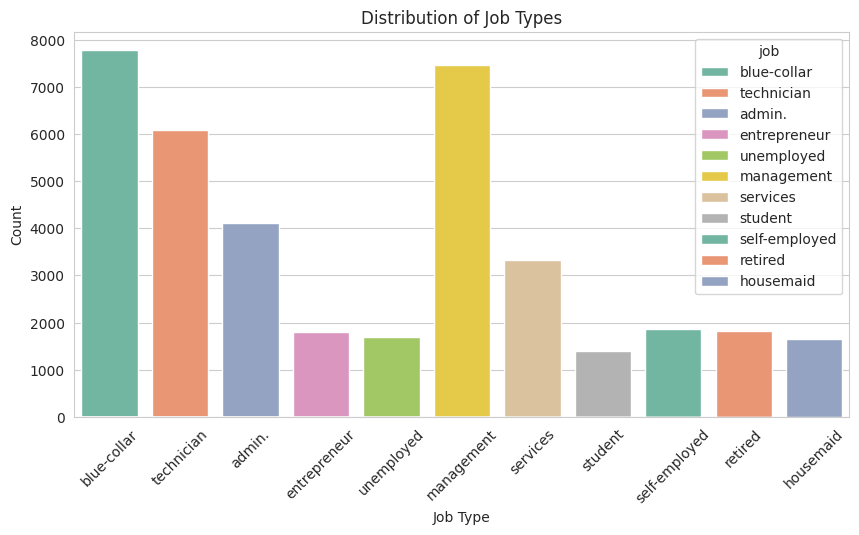

In [19]:
#The distribution of the categorical variable 'Job'
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")

# Create a count plot for the 'job' feature with color palette applied correctly
sns.countplot(data=train_df, x='job', hue='job', palette='Set2', dodge=False)
plt.title('Distribution of Job Types')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

In [20]:
# Calculate the count of each unique job type
job_counts = train_df['job'].value_counts()

# Print the job counts in text format
print("\nJob Type Counts:")
for job, count in job_counts.items():
    print(f"{job}: {count}")



Job Type Counts:
blue-collar: 7776
management: 7462
technician: 6078
admin.: 4116
services: 3325
self-employed: 1862
retired: 1824
entrepreneur: 1805
unemployed: 1685
housemaid: 1656
student: 1393


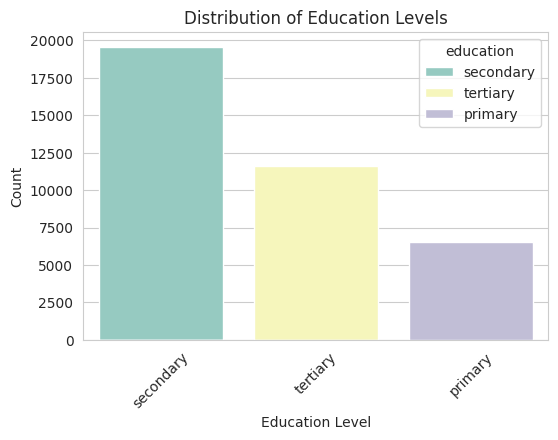

In [21]:
#Distribution of Education Levels
plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")

# Create a count plot for the 'education' feature with a different color palette
sns.countplot(data=train_df, x='education', hue='education', palette='Set3', dodge=False)
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

In [22]:
# Calculate the count of each unique Education Level
education_counts = train_df['education'].value_counts()

# Print the job counts in text format
print("\nEducation Level Counts:")
for education, count in education_counts.items():
    print(f"{education}: {count}")


Education Level Counts:
secondary: 19584
tertiary: 11615
primary: 6545


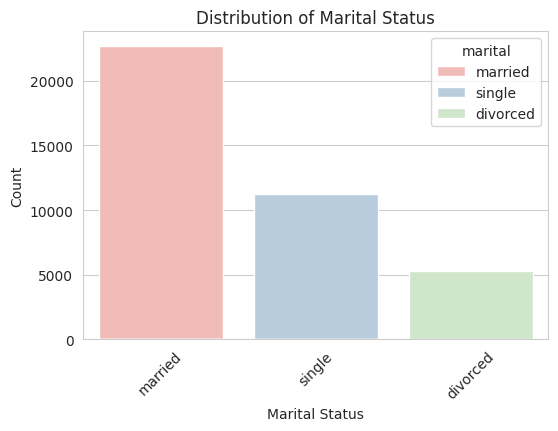

In [23]:
#Distribution of Marital Status
plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")

# Create a count plot for the 'marital' feature with a different color palette
sns.countplot(data=train_df, x='marital', hue='marital', palette='Pastel1', dodge=False)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

In [24]:
# Calculate the count of each unique Marital Status
marital_counts = train_df['marital'].value_counts()

# Print the job counts in text format
print("\nMarital Status Counts:")
for marital, count in marital_counts.items():
    print(f"{marital}: {count}")


Marital Status Counts:
married: 22691
single: 11250
divorced: 5270


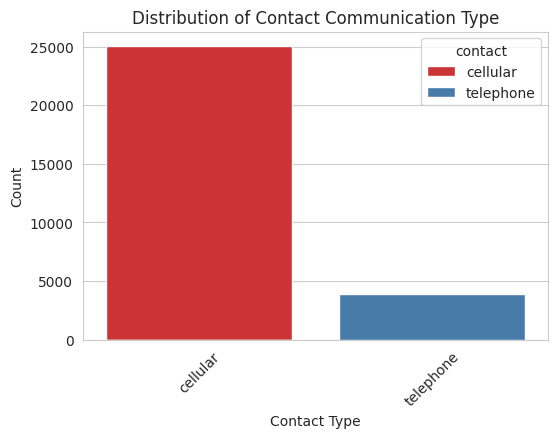

In [25]:
# Distribution of Contact Communication Type
plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")

# Create a count plot for the 'contact' feature with a different color palette
sns.countplot(data=train_df, x='contact', hue='contact', palette='Set1', dodge=False)
plt.title('Distribution of Contact Communication Type')
plt.xlabel('Contact Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

In [26]:
# Calculate the count of each unique Marital Status
contact_counts = train_df['contact'].value_counts()

# Print the job counts in text format
print("\nContact Type Counts:")
for contact, count in contact_counts.items():
    print(f"{contact}: {count}")


Contact Type Counts:
cellular: 25030
telephone: 3845


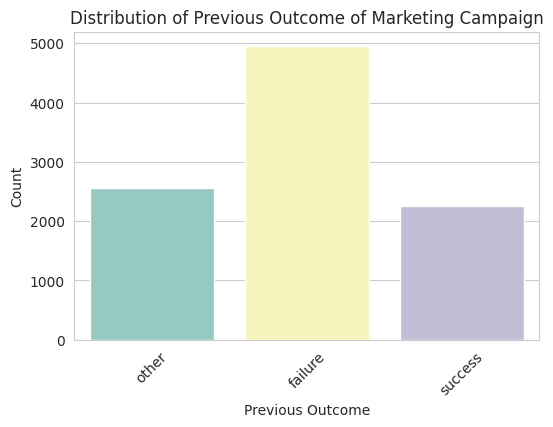

In [27]:
#Distribution of Previous Outcome of Marketing Campaign
plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")

# Create a count plot for the 'poutcome' feature with a different color palette
sns.countplot(data=train_df, x='poutcome', palette='Set3')
plt.title('Distribution of Previous Outcome of Marketing Campaign')
plt.xlabel('Previous Outcome')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

In [28]:
# Calculate the count of each unique Marital Status
poutcome_counts = train_df['poutcome'].value_counts()

# Print the job counts in text format
print("\npoutcome Counts:")
for poutcome, count in poutcome_counts.items():
    print(f"{poutcome}: {count}")


poutcome Counts:
failure: 4949
other: 2560
success: 2251


# **2.2 Summary**

## **Dataset Overview**
The dataset pertains to the direct marketing campaigns of a banking institution. These marketing campaigns were carried out through phone calls, and multiple contacts were often needed to assess whether a client would subscribe to a term deposit (binary outcome: "yes" or "no").

## **Columns Description**

1. **Last Contact Date**: The date when the client was last contacted during the campaign.

2. **Age**: The age of the client.

3. **Job**: The type of job the client holds.

4. **Marital Status**: The marital status of the client.

5. **Education**: The client's highest education level.

6. **Default**: Whether the client has credit in default.

7. **Balance**: The average yearly balance of the client in euros.

8. **Housing**: Whether the client has a housing loan .

9. **Loan**: Whether the client has a personal loan.
   
10. **Contact**: The communication type used to contact the client.

11. **Duration**: The duration of the last contact, in seconds.

12. **Campaign**: The number of contacts performed during the current marketing campaign for this client (including the last contact).

13. **Pdays**: The number of days since the client was last contacted in a previous campaign. -1 means the client was not previously contacted.

14. **Previous**: The number of contacts performed before the current campaign for this client.

15. **Poutcome**: The outcome of the previous marketing campaign.

16. **Target**: The target variable indicating whether the client subscribed to a term deposit.

## **Missing Values in Training Dataset**
There are missing values in several categorical features:
- **Job**: 229 
- **Education**: 1467
- **Contact**: 10336
- **poutcomes**: 29451

## **Numerical Features**
- **Age**:
  * The age of the client ranges from 18 to 95, with an average age of about 42 years.
  * Most clients are middle aged, with few younger and older individuals.
- **Balance**:
  * The Balance of the client ranges from -8019 to 102,127 Euros, with an mean of 5442.
  * The feature is skewed with a few negative values.The larger range suggests a significant variance.
- **Duration**:
  * The range varies from 0 seconds to 4918 seconds.
  * Duration is likely a strong predictor for the target variable, as longer calls may indicate more engaged clients.
- **Campaign**:
  * The average call duration for the campaign per client was 5.11 and the range 1 to 63.
  * The number of contacts per client varies significantly.There may be clients who were contacted frequently due to previous rejections.
- **Pdays**:
  * The no. of days passed after the client was last contacted from previous campaigns varies from -1(means not at all contacted) to 871 days.
- **Previous**:
  * The no. of contacts performed before this campaign and for this client varies from 0 to 275.

## **Categorical Features**
- **Job**: The most common job type among clients is "blue-collar," indicating a large proportion of blue-collar workers within this dataset.

- **Marital**: The majority of clients are "married," followed by "single" and "divorced" clients.

- **Education**: "Secondary" education is the most common level, followed by "tertiary."

- **Contact**: "Cellular" is the most commonly used contact method, followed by "telephone."

## **Target Variable**
The target variable exhibits an **imbalanced distribution**, with the majority of responses being "**no**" (33,384 instances, **85.14%**) and the minority of responses being "**yes**" (5,827 instances, **14.86%**). The **Imbalance Ratio (IR)** is approximately **5.73**.

# **4. Data Preprocessing**

## 4.1 Separate I/O

In [29]:
# Separating the input features and the target variable
features = train_df.iloc[:, :-1]
target = train_df.iloc[:, -1]

## 4.2 Handle Missing Values

In [30]:
# Handle missing values
def handle_nan(df):
    # List of categorical columns with missing values
    categorical_features = ['job', 'education', 'contact', 'poutcome']

    # Fill missing values in categorical columns with 'Unknown'
    for feature in categorical_features:
        if feature in df.columns:  # Use df.columns to check if the column exists
            df[feature] = df[feature].fillna('Unknown')

    # Replace -1 with 0 in 'pdays' column (since -1 means the client was not contacted)
    if 'pdays' in df.columns:
        df['pdays'] = df['pdays'].replace(-1, 0)  # Change -1 to 0

    return df

# Apply the function to both training and test dataset
features = handle_nan(features)
test_df = handle_nan(test_df)

In [31]:
#Checking if any NaN values exists
features.isnull().sum(), test_df.isnull().sum()

(last contact date    0
 age                  0
 job                  0
 marital              0
 education            0
 default              0
 balance              0
 housing              0
 loan                 0
 contact              0
 duration             0
 campaign             0
 pdays                0
 previous             0
 poutcome             0
 dtype: int64,
 last contact date    0
 age                  0
 job                  0
 marital              0
 education            0
 default              0
 balance              0
 housing              0
 loan                 0
 contact              0
 duration             0
 campaign             0
 pdays                0
 previous             0
 poutcome             0
 dtype: int64)

## 4.3 Feature Extraction

In [32]:
def extract_date_features(df, date_column):
    # Ensure the date column is in datetime format
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')

    # Extract day, month, and year into new columns
    df['last_contact_day'] = df[date_column].dt.day
    df['last_contact_month'] = df[date_column].dt.month
    df['last_contact_year'] = df[date_column].dt.year

    # Drop the original 'last contact date' column
    df = df.drop(columns=[date_column])

    return df

# Apply the function to your dataframe
features = extract_date_features(features, 'last contact date')
test_df = extract_date_features(test_df, 'last contact date')


Distribution of Numerical Features:


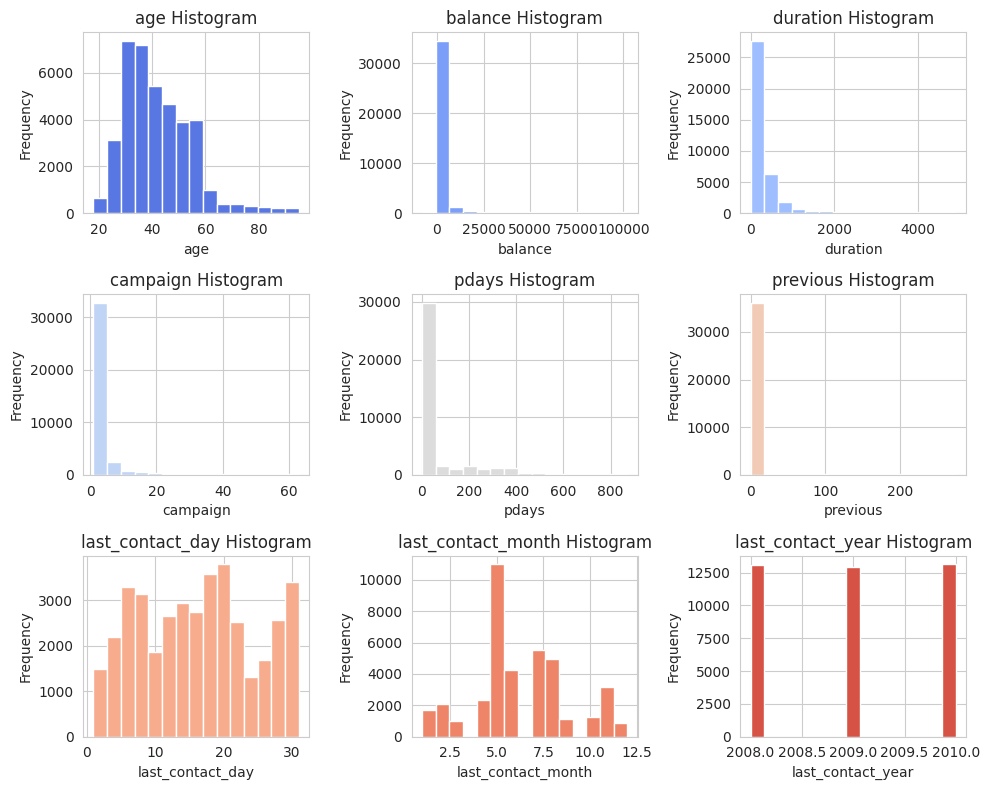

In [33]:
# Select the numeric columns
numeric_features = features.select_dtypes(include=['int64', 'int32']).columns

# Print descriptive statistics
print("\nDistribution of Numerical Features:")

# Create a color palette from seaborn
colors = sns.color_palette("coolwarm", len(numeric_features))

# Plot histograms for numerical features
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 8))
axes = axes.flatten()

for i, column in enumerate(numeric_features):
    features[column].hist(bins=15, color=colors[i], ax=axes[i])  # Adding color for each histogram
    axes[i].set_title(f'{column} Histogram')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

## 4.4 Pipelines

In [34]:
#Preprocessing Pipeline for Categorical features
categorical_features = features.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [35]:
# Preprocessing Pipeline for Numerical features
numerical_features = features.select_dtypes(include=['int64', 'int32']).columns
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Scaling the features to have mean 0 and variance 1
])

In [36]:
# Combine both transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [37]:
# Encode the target variable
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# **5. Training The Model**

In [38]:
# Split the data into training and validation sets
features_train, features_val, target_train, target_val = train_test_split(features, target_encoded, test_size=0.2, random_state=42)

## **5.1 Dummy Classifier**

In [39]:
# Assigning of the model
dummy_model = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', DummyClassifier(strategy='most_frequent', random_state=42))])
# Fit the model
dummy_model.fit(features_train, target_train)

# Predict on the validation set
target_val_pred_dummy = dummy_model.predict(features_val)

# Calculate F1 Score (macro average)
f1_score_dummy = f1_score(target_val, target_val_pred_dummy, average='macro')

# Cross-validation score
cv_scores_dummy = cross_val_score(dummy_model, features_train, target_train, cv=5, scoring='f1_macro')
mean_cv_score_dummy = cv_scores_dummy.mean()

#Variable for storing classification report
report_dummy = classification_report(target_val, target_val_pred_dummy, zero_division=0)

print("Dummy Classifier Model")
print(f"Validation F1 Score (Macro Average): {f1_score_dummy}")
print(f"Cross-Validation F1 Score (Macro Average): {mean_cv_score_dummy}")
print(f"Classification Report:\n{'-'*30}\n{report_dummy}")

Dummy Classifier Model
Validation F1 Score (Macro Average): 0.45865543898398675
Cross-Validation F1 Score (Macro Average): 0.46016831029375804
Classification Report:
------------------------------
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      6645
           1       0.00      0.00      0.00      1198

    accuracy                           0.85      7843
   macro avg       0.42      0.50      0.46      7843
weighted avg       0.72      0.85      0.78      7843



## **5.2 Decision Tree Classifier**

In [40]:
# Assigning the Decision Tree Classifier model
model_dt = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', DecisionTreeClassifier(random_state=42))])

# Fit the model
model_dt.fit(features_train, target_train)

# Predict on the validation set
target_val_pred_dt = model_dt.predict(features_val)

# Calculate F1 Score (macro average)
f1_score_dt = f1_score(target_val, target_val_pred_dt, average='macro')

# Cross-validation score
cv_scores_dt = cross_val_score(model_dt, features_train, target_train, cv=5, scoring='f1_macro')
mean_cv_score_dt = cv_scores_dt.mean()

#Variable for storing classification report
report_dt = classification_report(target_val, target_val_pred_dt, zero_division=0)

# Output the results
print("Decision Tree Classifier Model")
print(f"Validation F1 Score (Macro Average): {f1_score_dt}")
print(f"Cross-Validation F1 Score (Macro Average): {mean_cv_score_dt}")
print(f"Classification Report:\n{'-'*30}\n{report_dt}")

Decision Tree Classifier Model
Validation F1 Score (Macro Average): 0.6923283452442058
Cross-Validation F1 Score (Macro Average): 0.6875027314800949
Classification Report:
------------------------------
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      6645
           1       0.49      0.47      0.48      1198

    accuracy                           0.84      7843
   macro avg       0.70      0.69      0.69      7843
weighted avg       0.84      0.84      0.84      7843



## **5.3 Gradient Boosting Classifier**

In [41]:
# Assigning the Gradient Boosting Classifier model within a pipeline
model_gb = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', GradientBoostingClassifier(random_state=42))])

# Fit the model
model_gb.fit(features_train, target_train)

# Predict on the validation set
target_val_pred_gb = model_gb.predict(features_val)

# Calculate F1 Score (macro average)
f1_score_gb = f1_score(target_val, target_val_pred_gb, average='macro')

# Cross-validation score
cv_scores_gb = cross_val_score(model_gb, features_train, target_train, cv=5, scoring='f1_macro')
mean_cv_score_gb = cv_scores_gb.mean()

#Variable for storing classification report
report_gb = classification_report(target_val, target_val_pred_gb, zero_division=0)

# Output the results
print("Gradient Boosting Classifier Model")
print(f"Validation F1 Score (Macro Average): {f1_score_gb}")
print(f"Cross-Validation F1 Score (Macro Average): {mean_cv_score_gb}")
print(f"Classification Report:\n{'-'*30}\n{report_gb}")

Gradient Boosting Classifier Model
Validation F1 Score (Macro Average): 0.7070848328313145
Cross-Validation F1 Score (Macro Average): 0.7090809909741326
Classification Report:
------------------------------
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      6645
           1       0.59      0.42      0.49      1198

    accuracy                           0.87      7843
   macro avg       0.75      0.68      0.71      7843
weighted avg       0.85      0.87      0.86      7843



## **5.4 Extreme Gradient Boosting Classifier**

In [42]:
# Assigning the XGBoost Classifier model within a pipeline
model_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', XGBClassifier(eval_metric='logloss', random_state=42))])

# Fit the model
model_xgb.fit(features_train, target_train)

# Predict on the validation set
target_val_pred_xgb = model_xgb.predict(features_val)

# Calculate F1 Score (macro average)
f1_score_xgb = f1_score(target_val, target_val_pred_xgb, average='macro')

# Cross-validation score
cv_scores_xgb = cross_val_score(model_xgb, features_train, target_train, cv=5, scoring='f1_macro')
mean_cv_score_xgb = cv_scores_xgb.mean()

#Variable for storing classification report
report_xgb = classification_report(target_val, target_val_pred_xgb, zero_division=0)

# Output the results
print("Extreme Gradient Boosting (XGBoost) Classifier Model")
print(f"Validation F1 Score (Macro Average): {f1_score_xgb}")
print(f"Cross-Validation F1 Score (Macro Average): {mean_cv_score_xgb}")
print(f"Classification Report:\n{'-'*30}\n{report_xgb}")

Extreme Gradient Boosting (XGBoost) Classifier Model
Validation F1 Score (Macro Average): 0.7286179832078559
Cross-Validation F1 Score (Macro Average): 0.7297525218794579
Classification Report:
------------------------------
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      6645
           1       0.59      0.48      0.53      1198

    accuracy                           0.87      7843
   macro avg       0.75      0.71      0.73      7843
weighted avg       0.86      0.87      0.86      7843



## **5.5 Light Gradient Boosting Classifier**

In [43]:
# Assigning the LightGBM Classifier model within a pipeline
model_lgbm = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', LGBMClassifier(random_state=42, verbose=-1))])

# Fit the model
model_lgbm.fit(features_train, target_train)

# Predict on the validation set
target_val_pred_lgbm = model_lgbm.predict(features_val)

# Calculate F1 Score (macro average)
f1_score_lgbm = f1_score(target_val, target_val_pred_lgbm, average='macro')

# Cross-validation score
cv_scores_lgbm = cross_val_score(model_lgbm, features_train, target_train, cv=5, scoring='f1_macro')
mean_cv_score_lgbm = cv_scores_lgbm.mean()

#Variable for storing classification report
report_lgbm = classification_report(target_val, target_val_pred_lgbm, zero_division=0)

# Output the results
print("Light Gradient Boosting Machine (LightGBM) Classifier Model")
print(f"Validation F1 Score (Macro Average): {f1_score_lgbm}")
print(f"Cross-Validation F1 Score (Macro Average): {mean_cv_score_lgbm}")
print(f"Classification Report:\n{'-'*30}\n{report_lgbm}")

Light Gradient Boosting Machine (LightGBM) Classifier Model
Validation F1 Score (Macro Average): 0.7395152499651036
Cross-Validation F1 Score (Macro Average): 0.7329335350846605
Classification Report:
------------------------------
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      6645
           1       0.60      0.51      0.55      1198

    accuracy                           0.87      7843
   macro avg       0.76      0.72      0.74      7843
weighted avg       0.87      0.87      0.87      7843



# **6. Hyperparameter Tunning**

## **6.1 Hyperparameter Tuned LGM Classifier**

In [44]:
# Define the model pipeline
model_lgbm_ht = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LGBMClassifier(random_state=42, verbose=-1))])

# Parameter grid for hyperparameter tuning
param_grid_lgbm_ht = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 6, 9],
    'classifier__learning_rate': [0.01, 0.1, 0.2]
}

# GridSearchCV for hyperparameter tuning
grid_search_lgbm_ht = GridSearchCV(model_lgbm_ht, param_grid_lgbm_ht, cv=3, n_jobs=-1, scoring='f1_macro', verbose=-1)
grid_search_lgbm_ht.fit(features_train, target_train)

# Best parameters and score from GridSearchCV
best_params_lgbm_ht = grid_search_lgbm_ht.best_params_
best_score_lgbm_ht = grid_search_lgbm_ht.best_score_

# Evaluate the model on the validation set
target_val_pred_lgbm_ht = grid_search_lgbm_ht.predict(features_val)
val_f1_score_lgbm_ht = f1_score(target_val, target_val_pred_lgbm_ht, average='macro')

# Calculate cross-validation score on the training set
cv_scores_lgbm_ht = cross_val_score(grid_search_lgbm_ht.best_estimator_, features_train, target_train, cv=3, scoring='f1_macro')
mean_cv_score_lgbm_ht = cv_scores_lgbm_ht.mean()

#Variable for storing classification report
report_lgbm_ht = classification_report(target_val, target_val_pred_lgbm, zero_division=0)

# Output the results
print("Hyperparameter Tuned LightGBM Classifier Model with SMOTE")
print("Best Parameters:", best_params_lgbm_ht)
print("Best CV Score during tuning:", best_score_lgbm_ht)
print("Validation F1 Score after tuning:", val_f1_score_lgbm_ht)
print("Cross-Validation Score after tuning:", mean_cv_score_lgbm_ht)
print(f"Classification Report:\n{'-'*30}\n{report_lgbm_ht}")

Hyperparameter Tuned LightGBM Classifier Model with SMOTE
Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 6, 'classifier__n_estimators': 100}
Best CV Score during tuning: 0.7548126786392877
Validation F1 Score after tuning: 0.75873833513707
Cross-Validation Score after tuning: 0.7548126786392877
Classification Report:
------------------------------
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      6645
           1       0.60      0.51      0.55      1198

    accuracy                           0.87      7843
   macro avg       0.76      0.72      0.74      7843
weighted avg       0.87      0.87      0.87      7843



## **6.2 Hyperparameter Tuned XGB Classifier**

In [45]:
# Define the model pipeline with optional SMOTE
model_xgb_ht = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(random_state=42))
])

# Parameter grid for hyperparameter tuning
param_grid_xgb_ht = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 6, 9],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
}

# GridSearchCV for hyperparameter tuning
grid_search_xgb_ht = GridSearchCV(model_xgb_ht, param_grid_xgb_ht, cv=5, n_jobs=-1, 
                                  scoring='f1_macro', verbose=-1)

# Fit the model with GridSearchCV
grid_search_xgb_ht.fit(features_train, target_train)

# Best parameters and best score from GridSearchCV
best_params_xgb_ht = grid_search_xgb_ht.best_params_
best_score_xgb_ht = grid_search_xgb_ht.best_score_

# Evaluate the model on the validation set
target_val_pred_xgb_ht = grid_search_xgb_ht.predict(features_val)
val_f1_score_xgb_ht = f1_score(target_val, target_val_pred_xgb_ht, average='macro')

# Cross-validation score on the training set
cv_scores_xgb_ht = cross_val_score(grid_search_xgb_ht.best_estimator_, features_train, target_train, cv=5, scoring='f1_macro')
mean_cv_score_xgb_ht = cv_scores_xgb_ht.mean()

# Classification report
report_xgb_ht = classification_report(target_val, target_val_pred_xgb_ht, zero_division=0)

# Output the results
print("Hyperparameter Tuned XGBoost Classifier Model with SMOTE")
print(f"Best Parameters: {best_params_xgb_ht}")
print(f"Best CV Score during tuning: {best_score_xgb_ht}")
print(f"Validation F1 Score after tuning: {val_f1_score_xgb_ht}")
print(f"Cross-Validation Score after tuning: {mean_cv_score_xgb_ht}")
print(f"Classification Report:\n{'-'*30}\n{report_xgb_ht}")

Hyperparameter Tuned XGBoost Classifier Model with SMOTE
Best Parameters: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 6, 'classifier__n_estimators': 100}
Best CV Score during tuning: 0.759952676952766
Validation F1 Score after tuning: 0.7606544389315761
Cross-Validation Score after tuning: 0.759952676952766
Classification Report:
------------------------------
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      6645
           1       0.51      0.78      0.61      1198

    accuracy                           0.85      7843
   macro avg       0.73      0.82      0.76      7843
weighted avg       0.89      0.85      0.86      7843



# **7. Comparison of Models**

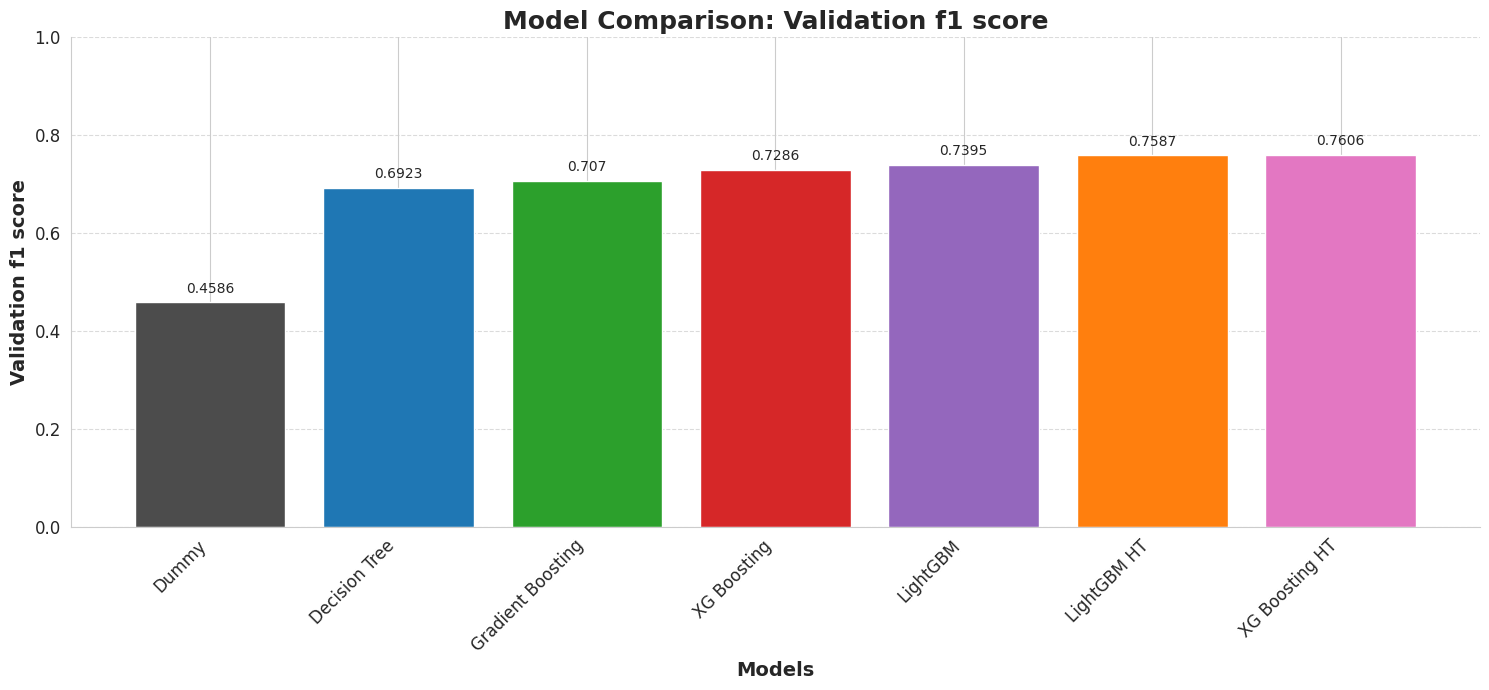

In [46]:
models = ['Dummy', 'Decision Tree', 'Gradient Boosting', 'XG Boosting', 'LightGBM', 'LightGBM HT', 'XG Boosting HT']
f1_score = [0.4586, 0.6923, 0.7070, 0.7286, 0.7395, 0.7587, 0.7606]  # Replace with actual validation accuracies

# Create a DataFrame to hold the model names and accuracies
model_comparison = pd.DataFrame({
    'Model': models,
    'Validation f1_score': f1_score
})

# Define a list of colors for the bars
bar_colors = [
    '#4c4c4c', '#1f77b4', '#2ca02c', '#d62728', 
    '#9467bd', '#ff7f0e', '#e377c2'  
]

# Plotting the bar chart with custom colors
plt.figure(figsize=(15, 7))
bars = plt.bar(models, f1_score, color=bar_colors)

# Adding aesthetics
plt.title('Model Comparison: Validation f1 score', fontsize=18, fontweight='bold')
plt.xlabel('Models', fontsize=14, fontweight='bold')
plt.ylabel('Validation f1 score', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1) 

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Removing the top and right borders for a cleaner look
sns.despine()

# Add data labels on top of bars for better readability
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 4), ha='center', fontsize=10)

# Display the plot with better layout
plt.tight_layout()
plt.show()


# **8. Summary & Insights from models**

## **8.1 Model Evaluation**
1. **Dummy Classifier**:
   * validation f1 score(macro_average): 0.4586
   * Cross-validation f1 score: 0.4601 
2. **Decision Tree Classifier**
   * validation f1 score(macro_average): 0.6923
   * Cross-validation f1 score: 0.6875
3. **Gradient Boosting Classifier**
   * validation f1 score(macro_average): 0.7070
   * Cross-validation f1 score: 0.7090
4. **Extreme Gradient Boosting Classifier**
   * validation f1 score(macro_average): 0.7286
   * Cross-validation f1 score: 0.7297
5. **Light Gradient Boosting Classifier**
   * validation f1 score(macro_average): 0.7395
   * Cross-validation f1 score: 0.7329

## **For Hyperparameter Tunned**
1. **Light Gradient Boosting Classifier**
   * Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 6, 'classifier__n_estimators': 100}
   * Validation F1 Score after tuning: 0.7587
   * Cross-Validation Score after tuning: 0.7548
   
2. **Extreme Gradient Boosting Classifier**
   * Best Parameters: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 6, 'classifier__n_estimators': 100}
   * Validation f1 Score after tuning: 0.7606
   * Cross-Validation Score after tuning: 0.7599

# **9. Submission of the best model**

In [47]:
def create_submission(model, filename):
    processed_test_features = test_df.copy()
    predicted_target = model.predict(processed_test_features)
    predicted_target_decoded = label_encoder.inverse_transform(predicted_target)
    submission = pd.DataFrame({
        "id": np.arange(len(predicted_target)),
        "target": predicted_target_decoded
    })
    submission.to_csv(filename, index=False)

# Create submission file
create_submission(grid_search_xgb_ht, "submission.csv")